In [400]:
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Predictive Analytics models
import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection  import train_test_split

In [401]:
train = pd.read_csv('train_dataset.csv')
test = pd.read_csv('test_dataset.csv')

In [402]:
print(train.shape)

(3200, 19)


In [403]:
print(test.shape)

(800, 18)


In [404]:
#Storing predictor in the separate variable for later use purposes.
Insurance = train.Insurance
print(Insurance)

0       0
1       0
2       0
3       0
4       0
       ..
3195    0
3196    0
3197    0
3198    1
3199    1
Name: Insurance, Length: 3200, dtype: int64


In [405]:
#Removing Insurance from Dataframe. Insurance does not contain any missing values and is a transformed variable only so no need of data wrandling on Insurance variable.
train = train.drop(columns="Insurance")

In [406]:
#We will combine both the dataframes for the purpose of Data Transformation and Missing value handling.
#Noting that the training has first 3200 rows and testing has last 800 rows
frames = [train,test]
combine = pd.concat(frames)
print(combine.shape)

(4000, 18)


In [407]:
combine.head(5)

,Id,Age,Job,MaritalStatus,Education,Default,Balance,HomeInsurance,Loan,Communication,DayLastContacted,MonthLastContacted,Contacts,DaysPassed,Attempts,Outcome,CallStartTime,CallEndTime
0,CP0,52,management,married,tertiary,0,751,0,0,cellular,14,may,4,371,5,failure,16:36:39,16:39:24
1,CP1,21,unemployed,married,secondary,0,2062,1,0,NaN,3,jun,1,-1,0,NaN,14:42:44,14:44:27
2,CP2,37,technician,single,tertiary,0,-1,1,0,cellular,2,feb,2,200,7,other,13:31:39,13:35:22
3,CP3,46,technician,single,tertiary,0,628,0,0,cellular,20,nov,5,-1,0,NaN,11:18:46,11:26:20
4,CP4,43,technician,married,secondary,0,3723,1,0,cellular,11,aug,4,-1,0,NaN,14:56:04,14:58:18


In [408]:
#Missing value handling
combine.isnull().sum()

Id                       0
Age                      0
Job                     19
MaritalStatus            0
Education              169
Default                  0
Balance                  0
HomeInsurance            0
Loan                     0
Communication          902
DayLastContacted         0
MonthLastContacted       0
Contacts                 0
DaysPassed               0
Attempts                 0
Outcome               3042
CallStartTime            0
CallEndTime              0
dtype: int64

In [409]:
combine.Job.value_counts()

management       893
blue-collar      759
technician       660
admin.           459
services         330
retired          249
self-employed    140
student          131
unemployed       130
entrepreneur     121
housemaid        109
Name: Job, dtype: int64

In [410]:
#Replacing missing values in Job with most frequent value of management
combine['Job'] = combine['Job'].fillna(combine['Job'].value_counts().index[0])

In [411]:
combine.Education.value_counts()

secondary    1988
tertiary     1282
primary       561
Name: Education, dtype: int64

In [412]:
combine['Education'] = combine['Education'].fillna(combine['Education'].value_counts().index[0])

In [413]:
combine.Communication.value_counts()

cellular     2831
telephone     267
Name: Communication, dtype: int64

In [414]:
combine['Communication'] = combine['Communication'].fillna(combine['Communication'].value_counts().index[0])

In [415]:
#Outcome doesn't make any sense in this case so removing that variable.
combine = combine.drop(columns="Outcome")

In [416]:
#Now we have final dataframe with no missing values
combine.isnull().sum()

Id                    0
Age                   0
Job                   0
MaritalStatus         0
Education             0
Default               0
Balance               0
HomeInsurance         0
Loan                  0
Communication         0
DayLastContacted      0
MonthLastContacted    0
Contacts              0
DaysPassed            0
Attempts              0
CallStartTime         0
CallEndTime           0
dtype: int64

# Data Transformation

In [417]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 799
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  4000 non-null   object
 1   Age                 4000 non-null   int64 
 2   Job                 4000 non-null   object
 3   MaritalStatus       4000 non-null   object
 4   Education           4000 non-null   object
 5   Default             4000 non-null   int64 
 6   Balance             4000 non-null   int64 
 7   HomeInsurance       4000 non-null   int64 
 8   Loan                4000 non-null   int64 
 9   Communication       4000 non-null   object
 10  DayLastContacted    4000 non-null   int64 
 11  MonthLastContacted  4000 non-null   object
 12  Contacts            4000 non-null   int64 
 13  DaysPassed          4000 non-null   int64 
 14  Attempts            4000 non-null   int64 
 15  CallStartTime       4000 non-null   object
 16  CallEndTime         4000 

In [418]:
#Data contains categorical variables of Job, MaritalStatus, Education, Communication, MonthLastContacted, CallStartTime and CallEndTime
#We will start by transforming each variable individually.

#First we will remove ID column from dataframe as its not needed in the predictive modelling.
combine = combine.drop(columns="Id")

In [419]:
#CallStartTime and CallEndTime are not needed but we will make a new variable called calltime with difference between callstarttime and callendtime.
#Converting the time into seconds while the call lasted.
from datetime import datetime
combine['CallEndTime'] = pd.to_datetime(combine['CallEndTime'], format='%H:%M:%S')
combine['CallStartTime'] = pd.to_datetime(combine['CallStartTime'], format='%H:%M:%S')
combine["CallTime"] = combine["CallEndTime"] - combine["CallStartTime"]
combine['CallTime'] = combine['CallTime'].dt.total_seconds()
print(combine['CallTime'].head(5))

0    165.0
1    103.0
2    223.0
3    454.0
4    134.0
Name: CallTime, dtype: float64


In [420]:
#Now we will remove the callstarttime and callendtime as those are unnecessary in the model.
combine = combine.drop(['CallEndTime','CallStartTime'], axis=1)
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 799
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4000 non-null   int64  
 1   Job                 4000 non-null   object 
 2   MaritalStatus       4000 non-null   object 
 3   Education           4000 non-null   object 
 4   Default             4000 non-null   int64  
 5   Balance             4000 non-null   int64  
 6   HomeInsurance       4000 non-null   int64  
 7   Loan                4000 non-null   int64  
 8   Communication       4000 non-null   object 
 9   DayLastContacted    4000 non-null   int64  
 10  MonthLastContacted  4000 non-null   object 
 11  Contacts            4000 non-null   int64  
 12  DaysPassed          4000 non-null   int64  
 13  Attempts            4000 non-null   int64  
 14  CallTime            4000 non-null   float64
dtypes: float64(1), int64(9), object(5)
memory usage: 500.0+ 

In [421]:
#Job Variable Conversion
#Job variable does not contain any order within its values so we will use one hot encoding to transform this variable.

import category_encoders as ce
enc = ce.BinaryEncoder(cols=['Job'],return_df=True)
combine = enc.fit_transform(combine)
combine.head(5)


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Age,Job_0,Job_1,Job_2,Job_3,Job_4,MaritalStatus,Education,Default,Balance,HomeInsurance,Loan,Communication,DayLastContacted,MonthLastContacted,Contacts,DaysPassed,Attempts,CallTime
0,52,0,0,0,0,1,married,tertiary,0,751,0,0,cellular,14,may,4,371,5,165.0
1,21,0,0,0,1,0,married,secondary,0,2062,1,0,cellular,3,jun,1,-1,0,103.0
2,37,0,0,0,1,1,single,tertiary,0,-1,1,0,cellular,2,feb,2,200,7,223.0
3,46,0,0,0,1,1,single,tertiary,0,628,0,0,cellular,20,nov,5,-1,0,454.0
4,43,0,0,0,1,1,married,secondary,0,3723,1,0,cellular,11,aug,4,-1,0,134.0


In [422]:
#MaritalStatus Variable Conversion
#MaritalStatus variable does not contain any order within its values so we will use one hot encoding to transform this variable.

enc = ce.BinaryEncoder(cols=['MaritalStatus'],return_df=True)
combine = enc.fit_transform(combine)
combine.head(5)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Age,Job_0,Job_1,Job_2,Job_3,Job_4,MaritalStatus_0,MaritalStatus_1,MaritalStatus_2,Education,Default,Balance,HomeInsurance,Loan,Communication,DayLastContacted,MonthLastContacted,Contacts,DaysPassed,Attempts,CallTime
0,52,0,0,0,0,1,0,0,1,tertiary,0,751,0,0,cellular,14,may,4,371,5,165.0
1,21,0,0,0,1,0,0,0,1,secondary,0,2062,1,0,cellular,3,jun,1,-1,0,103.0
2,37,0,0,0,1,1,0,1,0,tertiary,0,-1,1,0,cellular,2,feb,2,200,7,223.0
3,46,0,0,0,1,1,0,1,0,tertiary,0,628,0,0,cellular,20,nov,5,-1,0,454.0
4,43,0,0,0,1,1,0,0,1,secondary,0,3723,1,0,cellular,11,aug,4,-1,0,134.0


In [423]:
#Education is a ordinal variable so will transform it accordingly.
combine.Education.value_counts()

secondary    2157
tertiary     1282
primary       561
Name: Education, dtype: int64

In [424]:
#Education conversion.
enc = ce.OrdinalEncoder(cols=['Education'], return_df=True, mapping=[{'col':'Education','mapping':{'primary': 0,'secondary': 1, 'tertiary': 2}}])
combine = enc.fit_transform(combine)
combine.head(5)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Age,Job_0,Job_1,Job_2,Job_3,Job_4,MaritalStatus_0,MaritalStatus_1,MaritalStatus_2,Education,Default,Balance,HomeInsurance,Loan,Communication,DayLastContacted,MonthLastContacted,Contacts,DaysPassed,Attempts,CallTime
0,52,0,0,0,0,1,0,0,1,2,0,751,0,0,cellular,14,may,4,371,5,165.0
1,21,0,0,0,1,0,0,0,1,1,0,2062,1,0,cellular,3,jun,1,-1,0,103.0
2,37,0,0,0,1,1,0,1,0,2,0,-1,1,0,cellular,2,feb,2,200,7,223.0
3,46,0,0,0,1,1,0,1,0,2,0,628,0,0,cellular,20,nov,5,-1,0,454.0
4,43,0,0,0,1,1,0,0,1,1,0,3723,1,0,cellular,11,aug,4,-1,0,134.0


In [425]:
combine.Communication.value_counts()

cellular     3733
telephone     267
Name: Communication, dtype: int64

In [426]:
#Telephone communication has so less values almost 6.6% only. So binary encoding doesn't make much difference so just converting it as ordinal.
enc = ce.OrdinalEncoder(cols=['Communication'], return_df=True, mapping=[{'col':'Communication','mapping':{'cellular': 1,'telephone': 0}}])
combine = enc.fit_transform(combine)
combine.head(5)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Age,Job_0,Job_1,Job_2,Job_3,Job_4,MaritalStatus_0,MaritalStatus_1,MaritalStatus_2,Education,Default,Balance,HomeInsurance,Loan,Communication,DayLastContacted,MonthLastContacted,Contacts,DaysPassed,Attempts,CallTime
0,52,0,0,0,0,1,0,0,1,2,0,751,0,0,1,14,may,4,371,5,165.0
1,21,0,0,0,1,0,0,0,1,1,0,2062,1,0,1,3,jun,1,-1,0,103.0
2,37,0,0,0,1,1,0,1,0,2,0,-1,1,0,1,2,feb,2,200,7,223.0
3,46,0,0,0,1,1,0,1,0,2,0,628,0,0,1,20,nov,5,-1,0,454.0
4,43,0,0,0,1,1,0,0,1,1,0,3723,1,0,1,11,aug,4,-1,0,134.0


In [427]:
#MonthLastContacted is not needed variable as the days last contacted is given.
#So we will remove this column.
combine = combine.drop(columns="MonthLastContacted")

In [428]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 799
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               4000 non-null   int64  
 1   Job_0             4000 non-null   int64  
 2   Job_1             4000 non-null   int64  
 3   Job_2             4000 non-null   int64  
 4   Job_3             4000 non-null   int64  
 5   Job_4             4000 non-null   int64  
 6   MaritalStatus_0   4000 non-null   int64  
 7   MaritalStatus_1   4000 non-null   int64  
 8   MaritalStatus_2   4000 non-null   int64  
 9   Education         4000 non-null   int64  
 10  Default           4000 non-null   int64  
 11  Balance           4000 non-null   int64  
 12  HomeInsurance     4000 non-null   int64  
 13  Loan              4000 non-null   int64  
 14  Communication     4000 non-null   int64  
 15  DayLastContacted  4000 non-null   int64  
 16  Contacts          4000 non-null   int64  
 

## Data Standardization

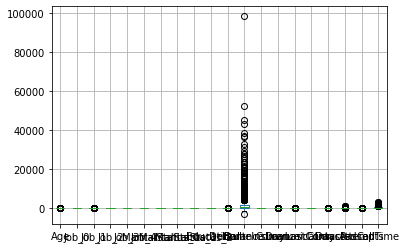

In [429]:
combine.boxplot()

In [459]:
combine.head(5)

,Age,Job_0,Job_1,Job_2,Job_3,Job_4,MaritalStatus_0,MaritalStatus_1,MaritalStatus_2,Education,Default,Balance,HomeInsurance,Loan,Communication,DayLastContacted,Contacts,DaysPassed,Attempts,CallTime
0,0.933889,0,0,0,0,1,0,0,1,1.252644,0,-0.222710,0,0,1,-0.204321,0.454579,3.021349,2.060492,-0.543096
1,-1.750384,0,0,0,1,0,0,0,1,-0.275437,0,0.150687,1,0,1,-1.510074,-0.524590,-0.465975,-0.345220,-0.724280
2,-0.364953,0,0,0,1,1,0,1,0,1.252644,0,-0.436893,1,0,1,-1.628779,-0.198200,1.418305,3.022776,-0.373601
3,0.414352,0,0,0,1,1,0,1,0,1.252644,0,-0.257742,0,0,1,0.507908,0.780969,-0.465975,-0.345220,0.301455
4,0.154584,0,0,0,1,1,0,0,1,-0.275437,0,0.623769,1,0,1,-0.560435,0.454579,-0.465975,-0.345220,-0.633688


In [475]:
from scipy.stats import zscore
combine_scaled = combine
combine_scaled['Age'] = zscore(combine_scaled['Age'])
combine_scaled['Education'] = zscore(combine_scaled['Education'])
combine_scaled['Balance'] = zscore(combine_scaled['Balance'])
combine_scaled['DayLastContacted'] = zscore(combine_scaled['DayLastContacted'])
combine_scaled['Contacts'] = zscore(combine_scaled['Contacts'])
combine_scaled['DaysPassed'] = zscore(combine_scaled['DaysPassed'])
combine_scaled['Attempts'] = zscore(combine_scaled['Attempts'])
combine_scaled['CallTime'] = zscore(combine_scaled['CallTime'])

In [476]:
combine_scaled.head(5)

,Age,Job_0,Job_1,Job_2,Job_3,Job_4,MaritalStatus_0,MaritalStatus_1,MaritalStatus_2,Education,Default,Balance,HomeInsurance,Loan,Communication,DayLastContacted,Contacts,DaysPassed,Attempts,CallTime
0,0.933889,0,0,0,0,1,0,0,1,1.252644,0,-0.222710,0,0,1,-0.204321,0.454579,3.021349,2.060492,-0.543096
1,-1.750384,0,0,0,1,0,0,0,1,-0.275437,0,0.150687,1,0,1,-1.510074,-0.524590,-0.465975,-0.345220,-0.724280
2,-0.364953,0,0,0,1,1,0,1,0,1.252644,0,-0.436893,1,0,1,-1.628779,-0.198200,1.418305,3.022776,-0.373601
3,0.414352,0,0,0,1,1,0,1,0,1.252644,0,-0.257742,0,0,1,0.507908,0.780969,-0.465975,-0.345220,0.301455
4,0.154584,0,0,0,1,1,0,0,1,-0.275437,0,0.623769,1,0,1,-0.560435,0.454579,-0.465975,-0.345220,-0.633688


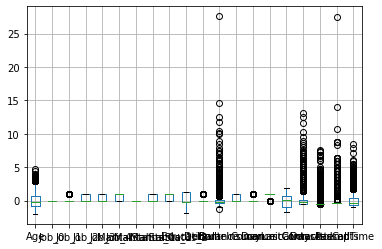

In [536]:
combine_scaled.boxplot()

In [508]:
train = combine_scaled.head(3200)
test = combine_scaled.tail(800)

In [514]:
from sklearn.feature_selection import SelectKBest, f_classif
#Feature selected variables
selector = SelectKBest(f_classif, k=15)

selected_data = selector.fit_transform(train, Insurance)
selected_data

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1 6] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


array([[ 0.93388893,  0.        ,  1.        , ...,  3.02134913,
         2.06049181, -0.54309577],
       [-1.7503842 ,  0.        ,  0.        , ..., -0.46597493,
        -0.34521959, -0.72427965],
       [-0.36495291,  0.        ,  1.        , ...,  1.41830501,
         3.02277637, -0.37360117],
       ...,
       [-0.36495291,  1.        ,  0.        , ..., -0.46597493,
        -0.34521959, -0.81487159],
       [-1.05766856,  0.        ,  1.        , ..., -0.46597493,
        -0.34521959,  0.16995048],
       [-0.10518454,  1.        ,  0.        , ...,  0.01212595,
         3.50391865,  0.70473517]])

In [515]:
selected_features = pd.DataFrame(selector.inverse_transform(selected_data), 
                                 index=train.index, 
                                 columns=train.columns)

selected_columns = selected_features.columns[selected_features.var() != 0]
selected_features[selected_columns].head()

,Age,Job_2,Job_4,MaritalStatus_1,MaritalStatus_2,Education,Default,Balance,HomeInsurance,Loan,DayLastContacted,Contacts,DaysPassed,Attempts,CallTime
0,0.933889,0.0,1.0,0.0,1.0,1.252644,0.0,-0.222710,0.0,0.0,-0.204321,0.454579,3.021349,2.060492,-0.543096
1,-1.750384,0.0,0.0,0.0,1.0,-0.275437,0.0,0.150687,1.0,0.0,-1.510074,-0.524590,-0.465975,-0.345220,-0.724280
2,-0.364953,0.0,1.0,1.0,0.0,1.252644,0.0,-0.436893,1.0,0.0,-1.628779,-0.198200,1.418305,3.022776,-0.373601
3,0.414352,0.0,1.0,1.0,0.0,1.252644,0.0,-0.257742,0.0,0.0,0.507908,0.780969,-0.465975,-0.345220,0.301455
4,0.154584,0.0,1.0,0.0,1.0,-0.275437,0.0,0.623769,1.0,0.0,-0.560435,0.454579,-0.465975,-0.345220,-0.633688


# Regression Modeling

In [516]:
#Seperating training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(selected_features, Insurance, test_size = 0.3, random_state = 5)

In [517]:
# Setup the machine learning model
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(solver='lbfgs', max_iter=10000)

# Fit the machine learning model
reg.fit(X_train,Y_train)

# Predict from the machine leanring model
Y_predict = reg.predict(X_test)
Y_train_predict = reg.predict(X_train)

In [518]:
from sklearn.metrics import accuracy_score

# Error calculation 
error_train = accuracy_score(Y_train_predict, Y_train)
print('Training Classif Accuracy: ' + str(error_train))
error_val = accuracy_score(Y_predict, Y_test)
print('Validation Classif Accuracy: ' + str(error_val))

Training Classif Accuracy: 0.7892857142857143
Validation Classif Accuracy: 0.7864583333333334


In [519]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(Y_test, Y_predict)
print(auc)

0.7666126674841962


# Neural Network

In [523]:
import sklearn as sk
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=10000)
NN.fit(X_train, Y_train)

Y_predict = NN.predict(X_test)
Y_train_predict = NN.predict(X_train)

In [524]:
# Error calculation 
error_train = accuracy_score(Y_train_predict, Y_train)
print('Training Classif Accuracy: ' + str(error_train))
error_val = accuracy_score(Y_predict, Y_test)
print('Validation Classif Accuracy: ' + str(error_val))

Training Classif Accuracy: 0.8258928571428571
Validation Classif Accuracy: 0.8


In [525]:
auc = roc_auc_score(Y_test, Y_predict)
print(auc)

0.7919236529994433


# k-fold cross validation

In [526]:
from sklearn import model_selection
k = 10 # use 10-Fold cross validation with logistic regression
kfold = model_selection.KFold(n_splits=k, random_state=2)
model = LogisticRegression()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [527]:
# Classification accuracy
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print("Accuracy: {:.2f} ({:.2f})".format(results.mean(), results.std()))

Accuracy: 0.79 (0.04)


In [528]:
auc = roc_auc_score(Y_test, Y_predict)
print(auc)

0.7919236529994433


# Random Forest Algorithm

In [529]:
#Random Forest
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(X_train, Y_train)
Y_predict = RF.predict(X_test)
Y_train_predict = RF.predict(X_train)

# Error calculation 
error_train = accuracy_score(Y_train_predict, Y_train)
print('Training Classif Accuracy: ' + str(error_train))
error_val = accuracy_score(Y_predict, Y_test)
print('Validation Classif Accuracy: ' + str(error_val))

Training Classif Accuracy: 0.7491071428571429
Validation Classif Accuracy: 0.74375


In [530]:
auc = roc_auc_score(Y_test, Y_predict)
print(auc)

0.6942137915118716


# Grid Search Based Parameter Tuning

In [531]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': [6, 8, 10, 11, 12], 'min_samples_split': [2, 3, 4]}
decision_tree = DecisionTreeClassifier(random_state=5)

grid_search_cv = GridSearchCV(decision_tree, params, verbose=1, cv=10)
grid_search_cv.fit(X_train, Y_train)




Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.3s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=5, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': [6, 8, 10, 11, 12],
                         'min_samples_split': [2, 3, 4]},
     

In [532]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=12,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

In [533]:
# Using best parameters from GridSearch
from sklearn.metrics import f1_score
selection = DecisionTreeClassifier(**grid_search_cv.best_params_)

# Using user defined parameters 
# selection = DecisionTreeClassifier(max_leaf_nodes=6, min_samples_split=2)

selection.fit(X_train, Y_train)
Y_train_predict = selection.predict(X_train)
Y_predict = selection.predict(X_test)

# Error calculation 
error_train = accuracy_score(Y_train_predict, Y_train)
print('Training Classif Accuracy: ' + str(error_train))
error_val = accuracy_score(Y_predict, Y_test)
print('Validation Classif Accuracy: ' + str(error_val))

Training Classif Accuracy: 0.8147321428571429
Validation Classif Accuracy: 0.7854166666666667


In [534]:
auc = roc_auc_score(Y_test, Y_predict)
print(auc)

0.7596010697268215


# Gradient Boosting Algorithm

In [535]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, Y_train)

Y_train_predict = model.predict(X_train)
Y_predict = model.predict(X_test)

auc = roc_auc_score(Y_test, Y_predict)
print(auc)

0.8053834771551782


In [496]:
predict = model.predict(test1)
testing_submission = pd.DataFrame()
testing_submission['Insurance'] = predict
testing_submission['Id'] = test['Id']

In [497]:
testing_submission.to_csv('submission.csv')

In [498]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, Y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, Y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, Y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.686
Accuracy score (validation): 0.665

Learning rate:  0.1
Accuracy score (training): 0.791
Accuracy score (validation): 0.779

Learning rate:  0.25
Accuracy score (training): 0.825
Accuracy score (validation): 0.807

Learning rate:  0.5
Accuracy score (training): 0.829
Accuracy score (validation): 0.811

Learning rate:  0.75
Accuracy score (training): 0.828
Accuracy score (validation): 0.792

Learning rate:  1
Accuracy score (training): 0.828
Accuracy score (validation): 0.790



In [500]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, Y_train)
predictions = gb.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(Y_test, predictions))
print()
print("Classification Report")
print(classification_report(Y_test, predictions))

y_scores_gb = gb.decision_function(X_test)
fpr_gb, tpr_gb, _ = roc_curve(Y_test, y_scores_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))

Confusion Matrix:
[[497  80]
 [101 282]]

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       577
           1       0.78      0.74      0.76       383

    accuracy                           0.81       960
   macro avg       0.81      0.80      0.80       960
weighted avg       0.81      0.81      0.81       960

Area under ROC curve = 0.88


In [501]:
predict = gb.predict(test1)
testing_submission = pd.DataFrame()
testing_submission['Insurance'] = predict
testing_submission['Id'] = test['Id']
testing_submission.to_csv('submission.csv')